# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

For the Renewable Energy datasets, the 'Who' would be governing agencies who oversee the clean energy initiatives and infrastructure planning of their respective countries. The 'What' would be enacting plans to expand renewable energy adoption based on available resources, practices of existing leaders in energy production, and future projections of expected energy consumption. The 'How' would be by highlighting global energy data trends through previous decades and the developments of specific leading countries in renewable energy adoption.

# 3. Homework - work with your own data

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [ ]:
import chardet
file_path = 'IRENA_RenewableEnergy_Statistics_2000-2022.csv'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

irena = pd.read_csv(file_path, encoding=result['encoding'])

irena.head()

   Region       Sub-region  Country ISO3 code  M49 code         RE or Non-RE  \
0  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   
1  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   
2  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   
3  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   
4  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   

  Group Technology   Technology        Producer Type  Year  \
0     Fossil fuels  Natural gas  On-grid electricity  2000   
1     Fossil fuels  Natural gas  On-grid electricity  2001   
2     Fossil fuels  Natural gas  On-grid electricity  2002   
3     Fossil fuels  Natural gas  On-grid electricity  2003   
4     Fossil fuels  Natural gas  On-grid electricity  2004   

   Electricity Generation (GWh)  Electricity Installed Capacity (MW)  
0                       24585.0                              5459.01  
1   

In [18]:
print("Shape of the dataset:", irena.shape)

irena.info()

Shape of the dataset: (35193, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35193 entries, 0 to 35192
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               35193 non-null  object 
 1   Sub-region                           35193 non-null  object 
 2   Country                              35193 non-null  object 
 3   ISO3 code                            35193 non-null  object 
 4   M49 code                             35193 non-null  int64  
 5   RE or Non-RE                         35193 non-null  object 
 6   Group Technology                     35193 non-null  object 
 7   Technology                           35193 non-null  object 
 8   Producer Type                        35193 non-null  object 
 9   Year                                 35193 non-null  int64  
 10  Electricity Generation (GWh)         35193 non-null  float64

In [19]:
print(irena.isnull().sum())

Region                                    0
Sub-region                                0
Country                                   0
ISO3 code                                 0
M49 code                                  0
RE or Non-RE                              0
Group Technology                          0
Technology                                0
Producer Type                             0
Year                                      0
Electricity Generation (GWh)              0
Electricity Installed Capacity (MW)    3599
dtype: int64


In [9]:
irena.describe()

,M49 code,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
count,35193.000000,35193.000000,3.519300e+04,3.159400e+04
mean,420.592618,2012.283437,1.440929e+04,3.452455e+03
std,252.192524,6.499073,1.148906e+05,2.715673e+04
min,4.000000,2000.000000,-5.874050e+02,1.000000e-03
25%,203.000000,2007.000000,1.168300e+01,5.000000e+00
50%,404.000000,2013.000000,2.002570e+02,5.890000e+01
75%,634.000000,2018.000000,2.383631e+03,6.325750e+02
max,894.000000,2022.000000,5.220700e+06,1.155325e+06


In [11]:
irena.describe(include='object')

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Producer Type
count,35193,35193,35193,35193,35193,35193,35193,35193
unique,5,17,224,224,2,10,19,2
top,Europe,Latin America and the Caribbean,United States of America (the),USA,Total Renewable,Fossil fuels,Oil,On-grid electricity
freq,10632,7134,531,531,22185,10359,5658,28675


In [13]:
categorical_columns = irena.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)
irena_encoded = pd.get_dummies(irena, columns=categorical_columns, drop_first=True)

irena_encoded.head()

Categorical columns: Index(['Region', 'Sub-region', 'Country', 'ISO3 code', 'RE or Non-RE',
       'Group Technology', 'Technology', 'Producer Type'],
      dtype='object')


,M49 code,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Region_Americas,Region_Asia,Region_Europe,Region_Oceania,Sub-region_Central Asia,Sub-region_Eastern Asia,...,Technology_Oil,Technology_Onshore wind energy,Technology_Other non-renewable energy,Technology_Pumped storage,Technology_Renewable hydropower,Technology_Renewable municipal waste,Technology_Solar photovoltaic,Technology_Solar thermal energy,Technology_Solid biofuels,Producer Type_On-grid electricity
0,12,2000,24585.0,5459.01,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,12,2001,25781.0,5455.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,12,2002,26994.0,5891.01,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,12,2003,28619.4,6013.24,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,12,2004,30312.0,6305.24,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


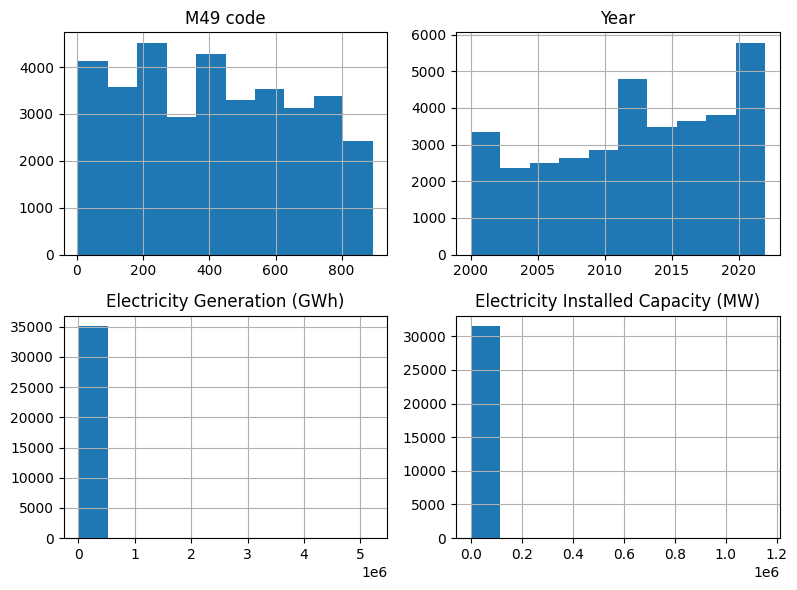

In [40]:
irena.hist(figsize=(8, 6), bins=10) 
plt.tight_layout()  
plt.show()

In [4]:
file_path_1 = 'organised_Gen.csv'

with open(file_path_1, 'rb') as f:
    result = chardet.detect(f.read())

us_data = pd.read_csv(file_path_1, encoding=result['encoding'])

print(us_data.head())

   Unnamed: 0  YEAR  MONTH STATE               TYPE OF PRODUCER  \
0           0  2001      1    AK  Total Electric Power Industry   
1           1  2001      1    AK  Total Electric Power Industry   
2           2  2001      1    AK  Total Electric Power Industry   
3           3  2001      1    AK  Total Electric Power Industry   
4           4  2001      1    AK  Total Electric Power Industry   

                ENERGY SOURCE  GENERATION (Megawatthours)  
0                        Coal                     46903.0  
1                   Petroleum                     71085.0  
2                 Natural Gas                    367521.0  
3  Hydroelectric Conventional                    104549.0  
4                        Wind                        87.0  


In [27]:
print("Shape of the dataset:", us_data.shape)

us_data.info()

Shape of the dataset: (496774, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  496774 non-null  int64  
 1   YEAR                        496774 non-null  int64  
 2   MONTH                       496774 non-null  int64  
 3   STATE                       496774 non-null  object 
 4   TYPE OF PRODUCER            496774 non-null  object 
 5   ENERGY SOURCE               496774 non-null  object 
 6   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 26.5+ MB


In [29]:
print(us_data.isnull().sum())

Unnamed: 0                    0
YEAR                          0
MONTH                         0
STATE                         0
TYPE OF PRODUCER              0
ENERGY SOURCE                 0
GENERATION (Megawatthours)    0
dtype: int64


In [30]:
us_data.describe()

,Unnamed: 0,YEAR,MONTH,GENERATION (Megawatthours)
count,496774.000000,496774.000000,496774.000000,4.967740e+05
mean,18143.269698,2011.649768,6.431452,1.393384e+06
std,13387.090505,6.168041,3.458944,1.078685e+07
min,0.000000,2001.000000,1.000000,-9.978550e+05
25%,7762.000000,2006.000000,3.000000,1.643000e+03
50%,15853.000000,2012.000000,6.000000,2.330103e+04
75%,24178.000000,2017.000000,9.000000,2.792042e+05
max,65144.000000,2022.000000,12.000000,4.217967e+08


In [31]:
us_data.describe(include='object')

,STATE,TYPE OF PRODUCER,ENERGY SOURCE
count,496774,496774,496774
unique,52,6,14
top,US-TOTAL,Total Electric Power Industry,Total
freq,18322,134452,73356


In [32]:
categorical_columns_1 = us_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns_1)
us_data_encoded = pd.get_dummies(us_data, columns=categorical_columns_1, drop_first=True)

us_data_encoded.head()

Categorical columns: Index(['STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE'], dtype='object')


,Unnamed: 0,YEAR,MONTH,GENERATION (Megawatthours),STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,...,ENERGY SOURCE_Nuclear,ENERGY SOURCE_Other,ENERGY SOURCE_Other Biomass,ENERGY SOURCE_Other Gases,ENERGY SOURCE_Petroleum,ENERGY SOURCE_Pumped Storage,ENERGY SOURCE_Solar Thermal and Photovoltaic,ENERGY SOURCE_Total,ENERGY SOURCE_Wind,ENERGY SOURCE_Wood and Wood Derived Fuels
0,0,2001,1,46903.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2001,1,71085.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2,2001,1,367521.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2001,1,104549.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2001,1,87.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


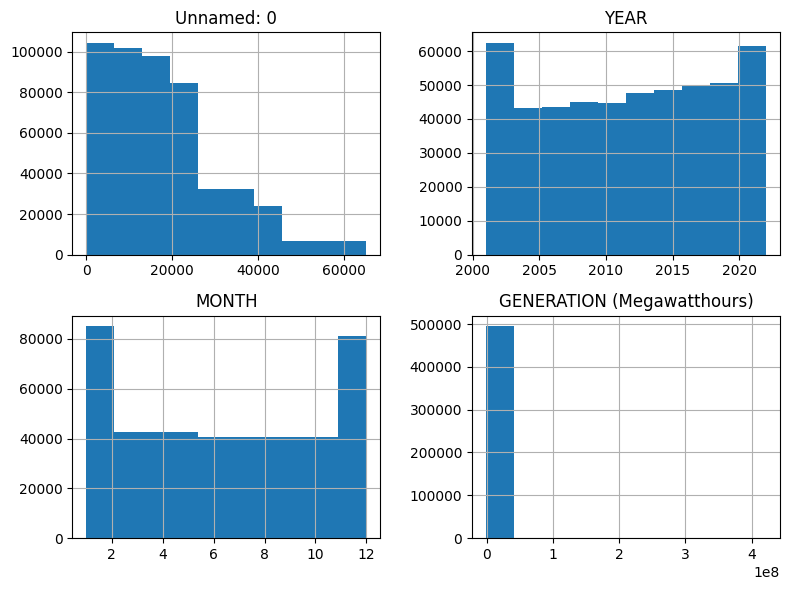

In [35]:
us_data.hist(figsize=(8, 6), bins=10) 
plt.tight_layout()  
plt.show()

In [5]:
file_path_2 = '02 modern-renewable-energy-consumption.csv'

with open(file_path_2, 'rb') as f:
    result = chardet.detect(f.read())

world_data = pd.read_csv(file_path_2, encoding=result['encoding'])

print(world_data.head())

   Entity Code  Year  Geo Biomass Other - TWh  Solar Generation - TWh  \
0  Africa  NaN  1971                    0.164                     0.0   
1  Africa  NaN  1972                    0.165                     0.0   
2  Africa  NaN  1973                    0.170                     0.0   
3  Africa  NaN  1974                    0.175                     0.0   
4  Africa  NaN  1975                    0.172                     0.0   

   Wind Generation - TWh  Hydro Generation - TWh  
0                    0.0               26.013390  
1                    0.0               29.633196  
2                    0.0               31.345707  
3                    0.0               35.667076  
4                    0.0               37.717968  


In [41]:
print("Shape of the dataset:", world_data.shape)

world_data.info()

Shape of the dataset: (5610, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5610 non-null   object 
 1   Code                     4299 non-null   object 
 2   Year                     5610 non-null   int64  
 3   Geo Biomass Other - TWh  5466 non-null   float64
 4   Solar Generation - TWh   5442 non-null   float64
 5   Wind Generation - TWh    5445 non-null   float64
 6   Hydro Generation - TWh   5603 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 306.9+ KB


In [43]:
print(world_data.isnull().sum())

Entity                        0
Code                       1311
Year                          0
Geo Biomass Other - TWh     144
Solar Generation - TWh      168
Wind Generation - TWh       165
Hydro Generation - TWh        7
dtype: int64


In [44]:
world_data.describe()

,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
count,5610.000000,5466.000000,5442.000000,5445.000000,5603.000000
mean,1993.834759,13.455595,5.480776,15.027906,147.892846
std,16.301699,47.644151,39.895114,84.727689,390.187379
min,1965.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,0.000000,0.000000,0.000000,1.368538
50%,1994.000000,0.227000,0.000000,0.000000,10.693000
75%,2008.000000,4.270843,0.017030,0.276075,65.841800
max,2021.000000,762.782650,1032.501200,1861.939800,4345.990000


In [45]:
world_data.describe(include='object')

,Entity,Code
count,5610,4299
unique,104,81
top,Africa,DZA
freq,57,57


In [46]:
categorical_columns_2 = world_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns_2)
world_data_encoded = pd.get_dummies(world_data, columns=categorical_columns_2, drop_first=True)

world_data_encoded.head()

Categorical columns: Index(['Entity', 'Code'], dtype='object')


,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Entity_Africa (BP),Entity_Algeria,Entity_Argentina,Entity_Asia,Entity_Asia Pacific (BP),...,Code_TKM,Code_TTO,Code_TUR,Code_TWN,Code_UKR,Code_USA,Code_UZB,Code_VEN,Code_VNM,Code_ZAF
0,1971,0.164,0.0,0.0,26.013390,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1972,0.165,0.0,0.0,29.633196,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1973,0.170,0.0,0.0,31.345707,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1974,0.175,0.0,0.0,35.667076,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1975,0.172,0.0,0.0,37.717968,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


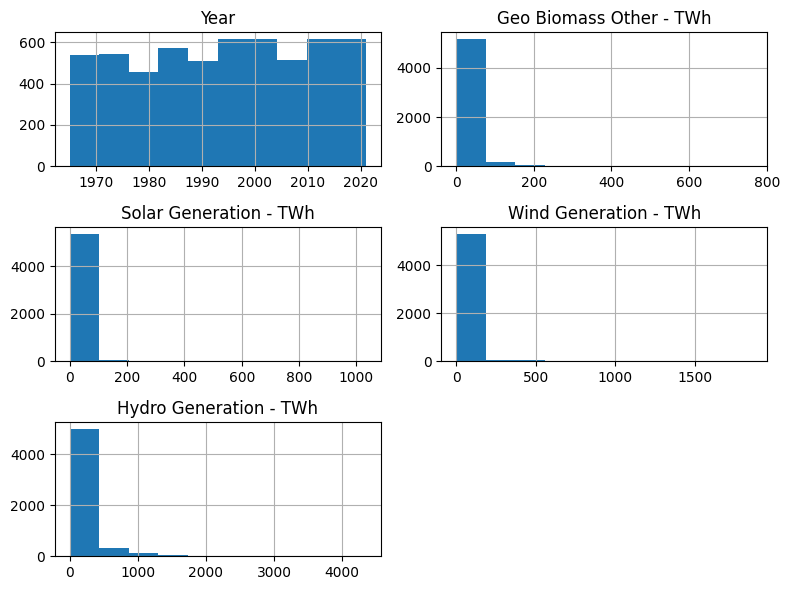

In [47]:
world_data.hist(figsize=(8, 6), bins=10) 
plt.tight_layout()  
plt.show()

To conclude, the renewable energy datasets contain comprehensive metrics on the production of clean energy both in the United States differentiated by state and global production partitioned by country. These datasets allow for future projection of energy requirements and analysis of energy trends over previous decades. The IRENA dataset doesn't contain missing values in any of the columns except for 'Electricity Installed Capacity' where missing values can be imputed or dropped in further analysis. The us_data dataset doesn't contain any missing or null values. The world_data dataset contains some missing values across multiple columns, which can also be imputed or dropped in further analysis. The histogram visualizations do not provide much insight, likely due to the scales of the x-axes/units of energy production. In future analysis, the graphs can be modified to more accurately show distributions. For metrics such as mean/median/mode, some metrics across the datasets are skewed as some energy categories are listed as 0 if the energy production category had not yet been adopted at the time. For categorical variables, one-hot encoding was utilized to transform them into numerical variables for future analysis (regression, etc.). These datasets are usable/suitable for further analysis, only with some modification and imputation required.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

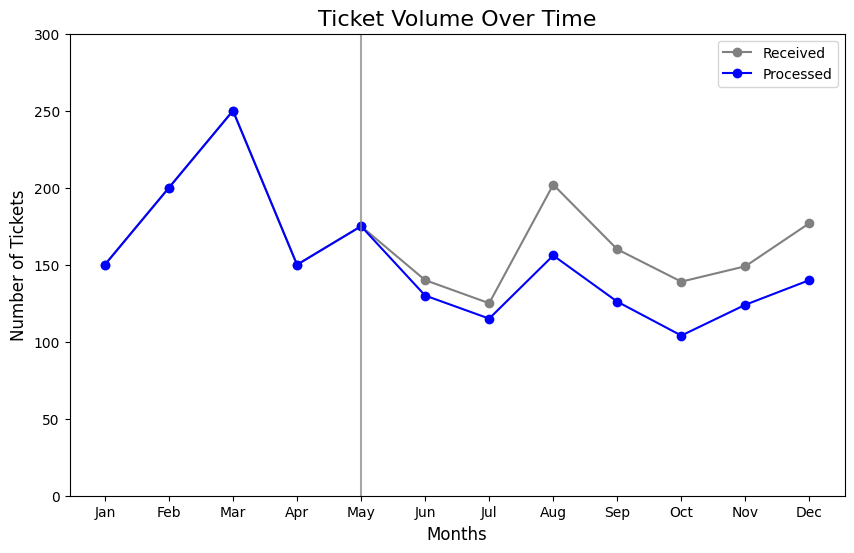

In [6]:
#Figure 0.3 from the Introduction of Storytelling with Data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [150, 200, 250, 150, 175, 140, 125, 202, 160, 139, 149, 177]
processed = [150, 200, 250, 150, 175, 130, 115, 156, 126, 104, 124, 140]

plt.plot(months, received, marker='o', label='Received', color='gray', linestyle='-')
plt.plot(months, processed, marker='o', label='Processed', color='blue', linestyle='-')

plt.axvline(x=4, color='gray', linestyle='-', alpha=0.7)  

plt.title("Ticket Volume Over Time", fontsize=16)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Tickets", fontsize=12)

plt.ylim(0, 300)

plt.legend()
plt.show()